# Linear Regression without any libraries
Predicting pizza sales using linear regression without using any machine learning libraries.
Will be using Numpy and Pandas for data manipulation and matplotlib for visualization.

The provided dataset contains information related to a pizza restaurant's performance, specifically focusing on factors such as reservations, temperature, the number of tourists, and the corresponding pizza sales. The dataset is organized into four columns:

- Reservations: The number of reservations made at the pizza restaurant.
- Temperature: The recorded temperature, likely in degrees Celsius or Fahrenheit, at- the time of data collection.
- Tourists: The count of tourists present at the location.
- Pizzas: The target variable, representing the number of pizzas sold.

Purpose:

This dataset is designed for exploring the potential relationships between reservations, weather conditions (temperature), the influx of tourists, and the resulting pizza sales. It can be used for regression analysis or predictive modeling to understand how these factors contribute to the overall sales of the pizza restaurant.

## Loading the Data

In [66]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
dataframe = pd.read_csv("num_of_pizzas.csv")
dataframe.head(5)

,Reservations,Temperature,Tourists,Pizzas
0,13,26,9,44
1,2,14,6,23
2,14,20,3,28
3,23,25,9,60
4,13,24,8,42


## Intro to Linear Regression

Linear regression is a foundational statistical and machine learning technique used to model the relationship between a dependent variable and one or more independent variables. It is widely applied in diverse fields such as economics, finance, and biology.

## Defining the model
y = wx + b

Where:
- y is the target variable
- x is the input feature
- w is the weight (coefficient)
- b is the bias (intercept)

The goal of linear regression is to find the best weight w and the bias b that minimize the error between the predicted output and the true output.

### What happens when we change the Weights?
The weights determine the influence of each feature on the predicted output. Changing the weights changes the slope of the line, which in turn changes the predicted output.

## Training Phase
The training phase involves using an optimization algorithm to find the best weights w and bias b that minimize the error between the predicted output and the true output.

### What is the error?
The error is the difference between the predicted output and the true output. It is calculated using a loss function, which measures the difference between the predicted and true values.

### What is the loss function?
The loss function measures the difference between the predicted and true values. It quantifies the error in the model's predictions during the training phase.

#### Mean Squared Error (MSE)
The mean squared error (MSE) is a common loss function used for linear regression. It measures the average of the squares of the errors or the difference between the predicted and true values.

## Prediction Phase
The prediction phase involves using the trained model to make predictions on new input data.


## Gradient Descent
Gradient descent is an optimization algorithm used to minimize the error between the predicted output and the true output. It works by iteratively adjusting the weights and bias to minimize the loss function.

The job of $train()$ is to find the parameters that minimize the loss. This is done by adjusting the weights and biases using the gradients of the loss with respect to the weights and biases.

To measure the gradient, we can use a mathematical tool called the derivative of the loss with respect to the weight
$$
\frac{\partial{L}}{\partial{w}}
$$

The derivative at a certain point measures how the loss L changes at that point for small variation of w.

If the derivative is a big number (either positive or negative), this means the curve is steep, and  the basecamp is far away. So the hiker can take big steps with confidence. As they approach the basecamp, the derivative becomes smaller, and so do their steps.

### Math behind Gradient Descent

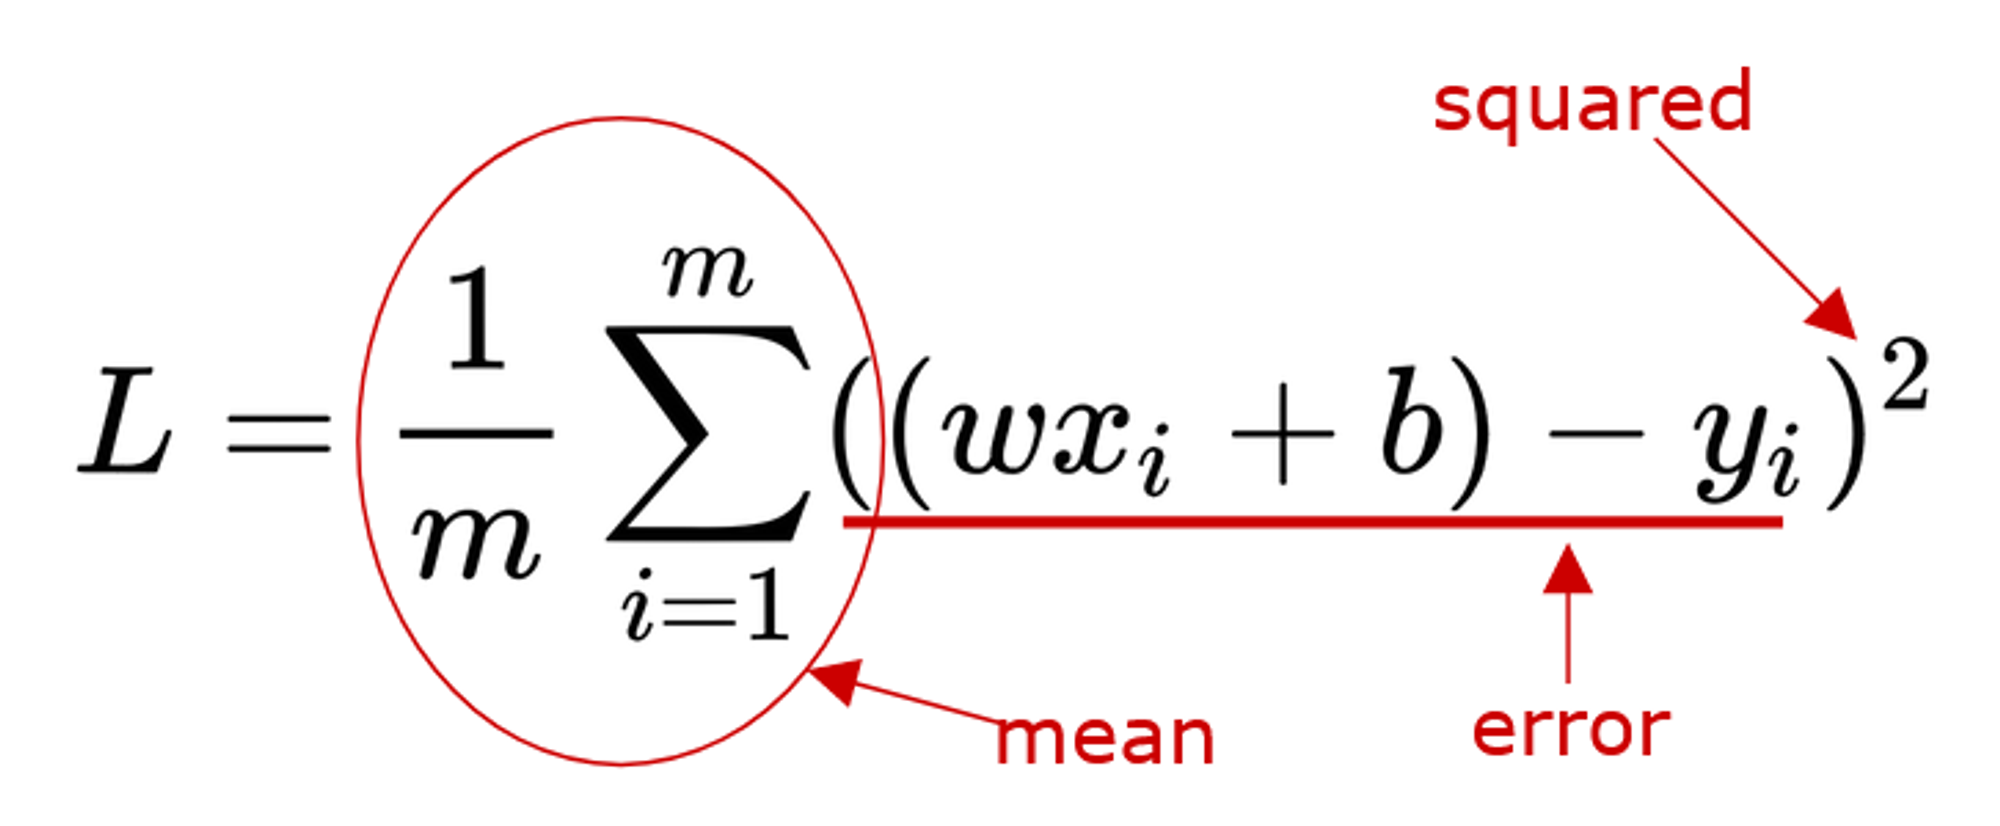

### Partial Derivatives
The partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant.
Once we have those one-dimensional slices, we can calculate the gradients on them.
If we combine the gradient of slices, then we get the gradient of the surface.

## When Gradient Descent is fails
GD does not give us any guarantees. By using it, we could follow a longer route than the shortest possible one. We could step past he basecamp and then have to backtrack. Most GD failures have to do with the shape of the loss surface.

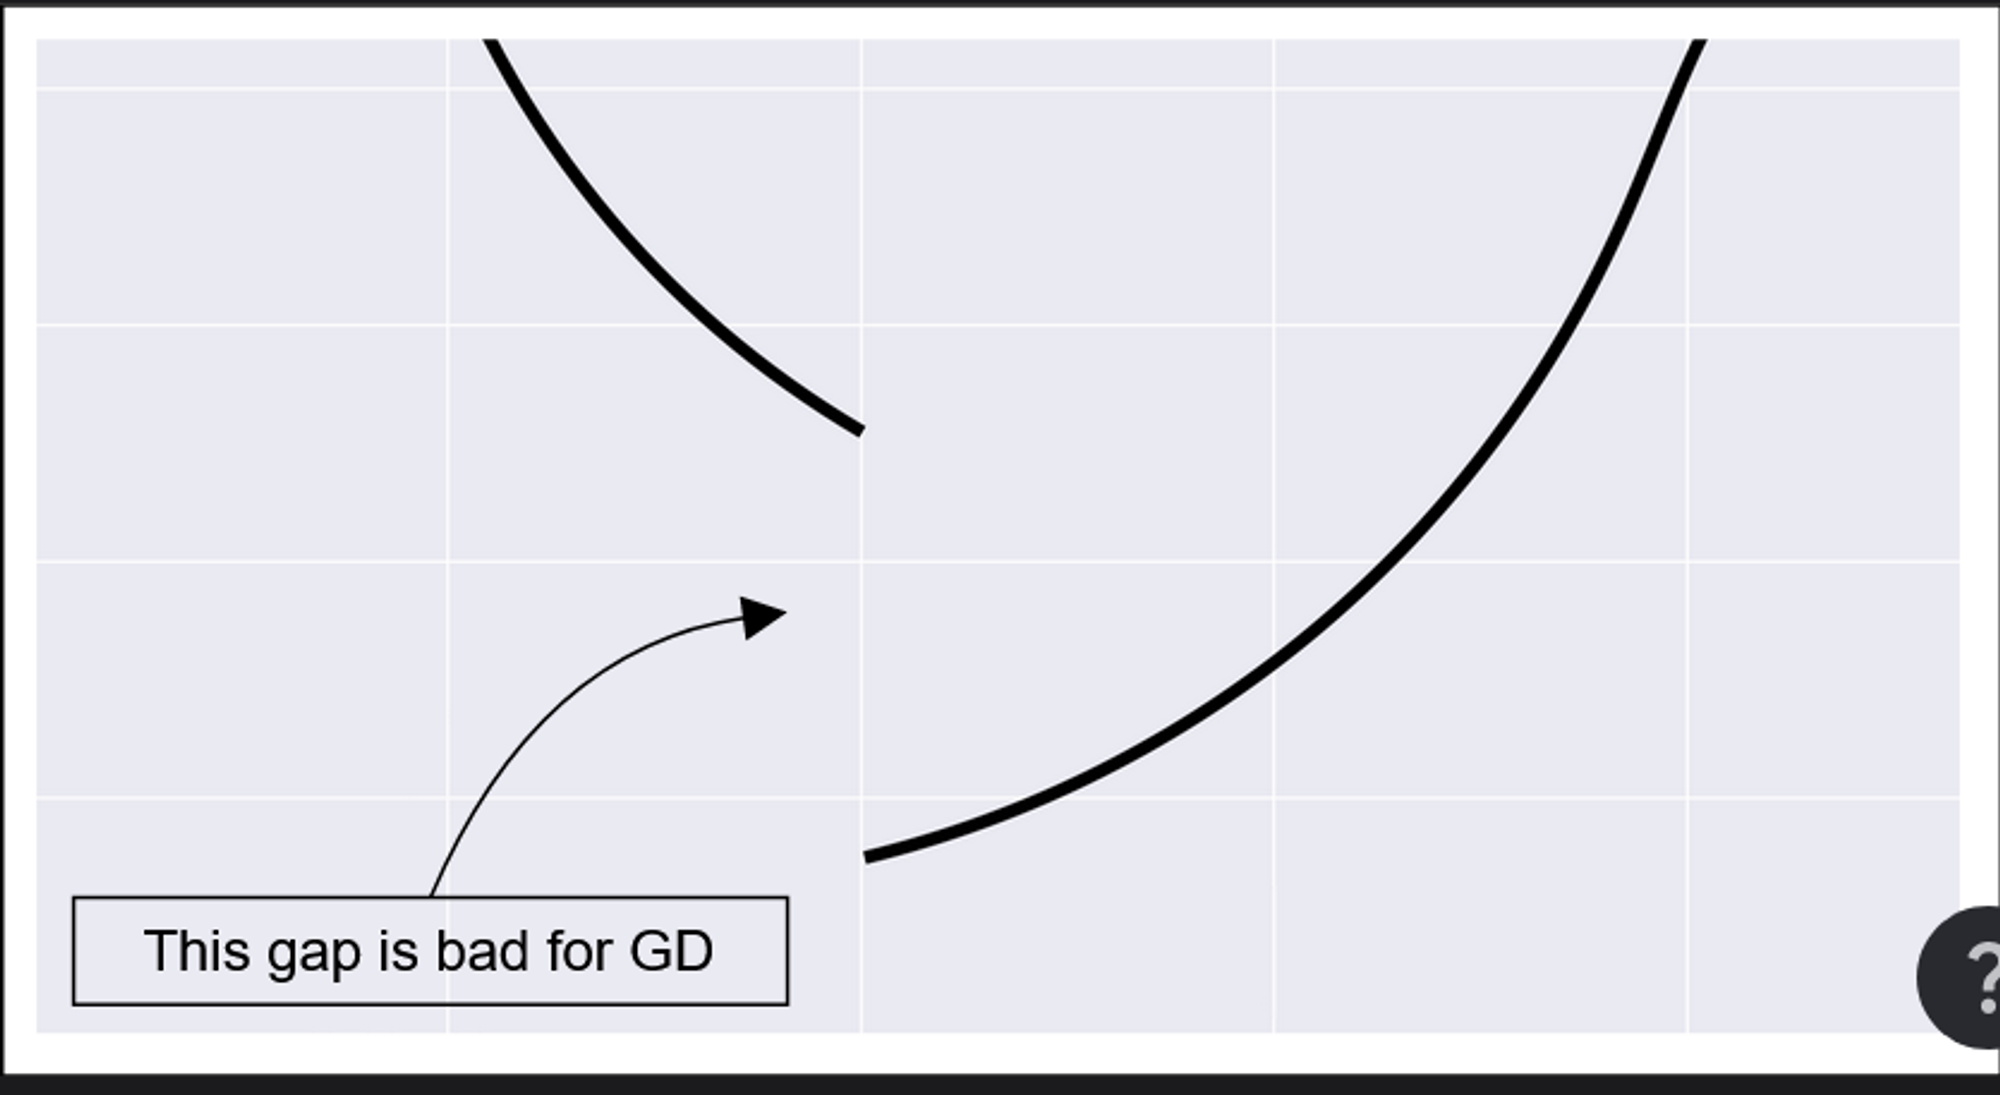
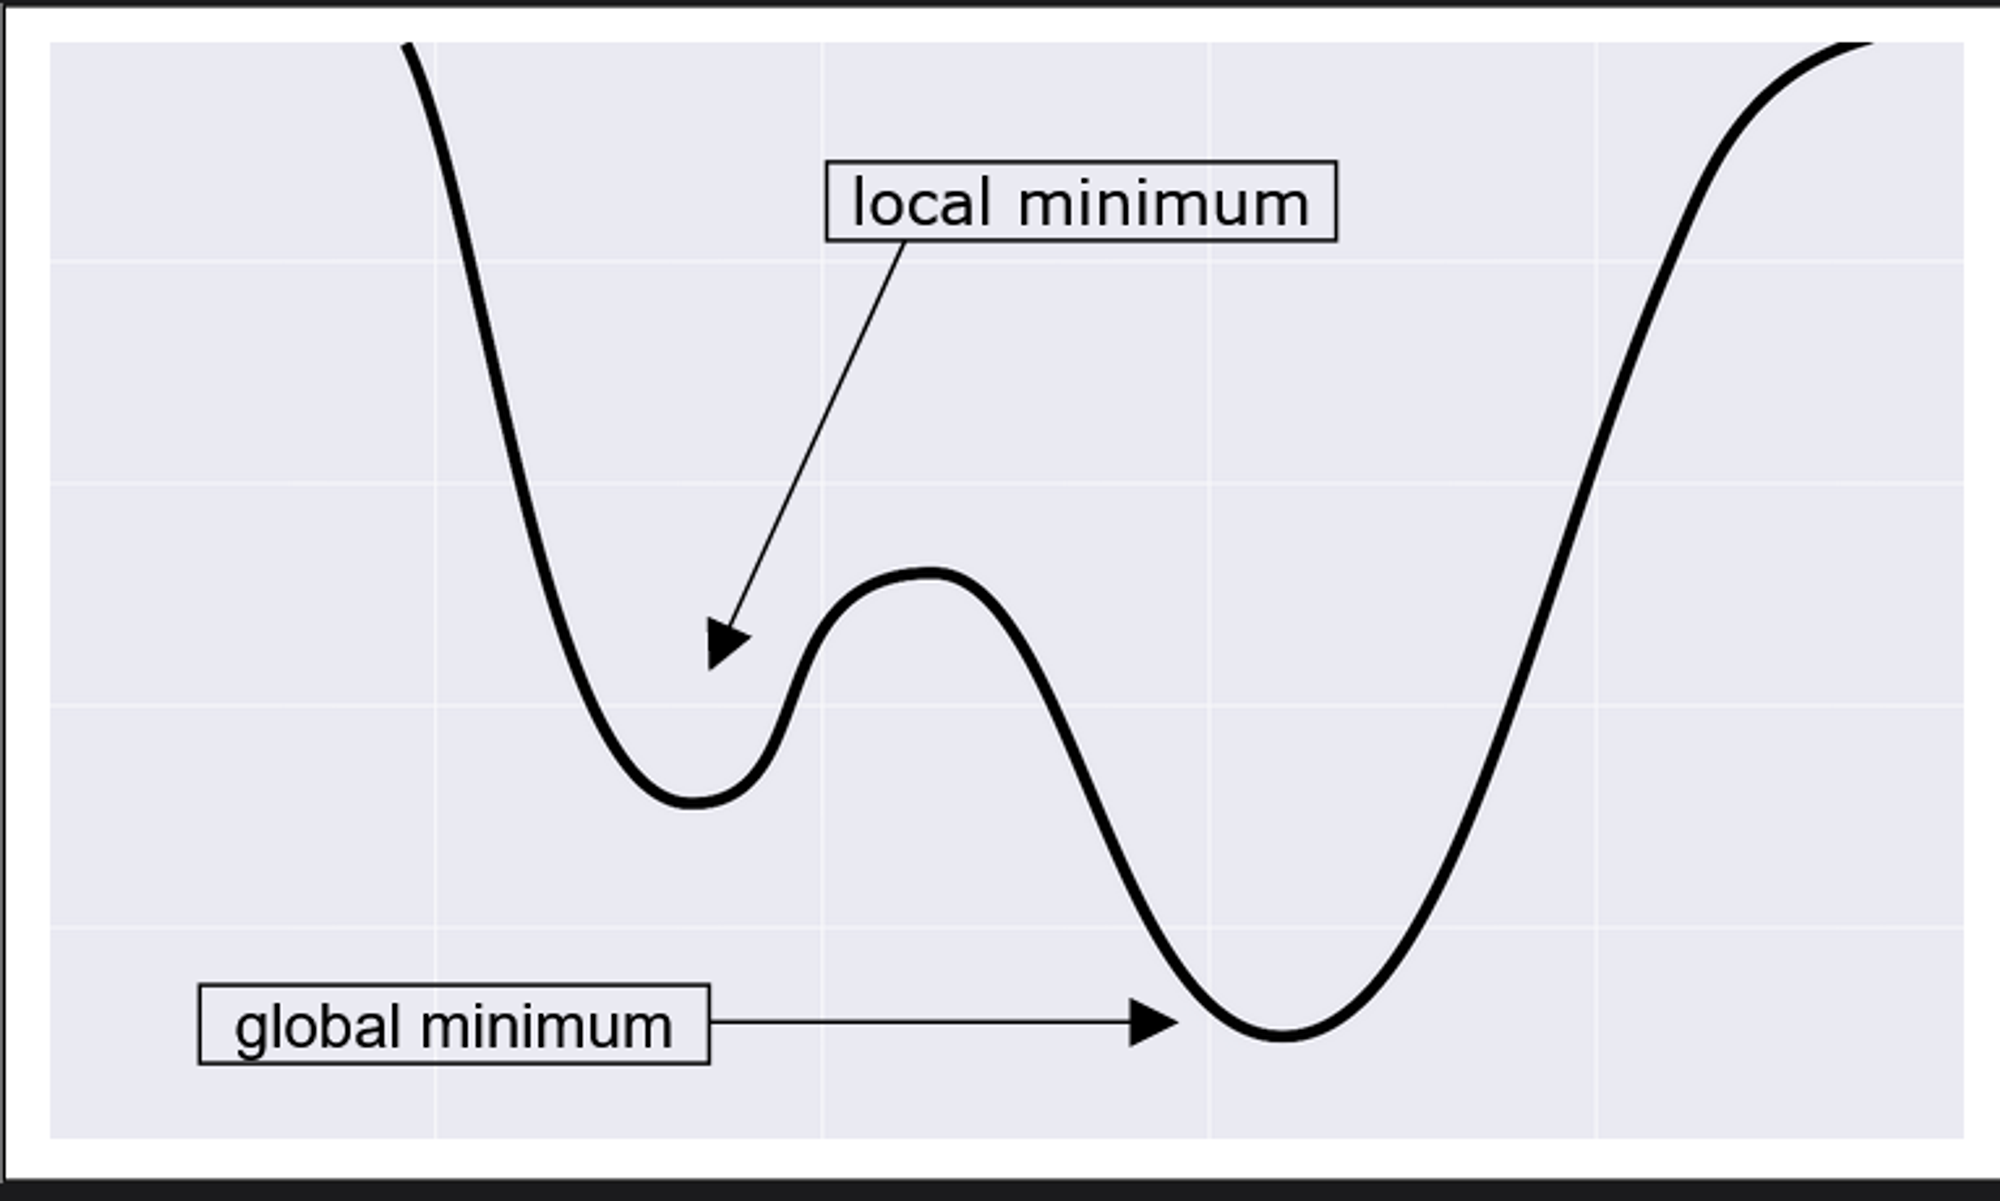

A good loss function should be:

- Convex: It does not have bumps that result in local minima
- Continuous: It does not have vertical cliffs or gaps.
- Differentiable: It is smooth, without cusps and other weird spots where we cannot even calculate a derivative.

## What is Learning Rate?
The learning rate is a hyperparameter that controls the size of the steps taken during the optimization process. It is a critical parameter that can affect the convergence of the optimization algorithm.

### How to choose the learning rate?
- If the learning rate is too small, the optimization process may take a long time to converge, or it may get stuck in a local minimum.
- If the learning rate is too large, the optimization process may overshoot the minimum and fail to converge.

### How to find the best learning rate?
- We can use a technique called learning rate scheduling, which involves gradually reducing the learning rate during training.
- We can also use a technique called learning rate annealing, which involves reducing the learning rate by a fixed amount after a certain number of epochs.

### Hyperparameters
Hyperparameters are the parameters that are not learned during the training process. They are set before the training process begins and are used to control the learning process.


In [83]:
# computing the predictions
def predict(X, w):
    return np.matmul(X, w)

# calculating the loss
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

# evaluating the gradient
def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

# performing the training phase for our classifier
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        if (i % 5000 == 0):
            print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

In [73]:
# Calculate the index for splitting (80% training, 20% testing)
split_index = int(0.8 * len(dataframe))

# Split the dataset into training and testing sets
train_set = dataframe.iloc[:split_index]
test_set = dataframe.iloc[split_index:]

# Separate features (X) and target variable (y) for training set
X_train = dataframe.drop("Pizzas", axis=1)
X_train = X_train.to_numpy()
x1, x2, x3 = X_train.T
X_train = np.column_stack((np.ones(x1.size), x1, x2, x3))

y_train = dataframe["Pizzas"]
y_train = y_train.to_numpy().reshape(-1, 1)

# Separate features (X) and target variable (y) for testing set
X_test = dataframe.drop("Pizzas", axis=1)
X_test = X_test.to_numpy()
x1, x2, x3 = X_test.T
X_test = np.column_stack((np.ones(x1.size), x1, x2, x3))
y_test = dataframe["Pizzas"]
y_test = y_test.to_numpy().reshape(-1, 1)

In [84]:
# train the model
w  = train(X_train, y_train, iterations=50000, lr=0.001)

# # make predictions
y_pred = predict(X_test, w)

# # calculate the accuracy
print("Test Accuracy: ", 1 - (np.abs(y_test - y_pred) / y_test).mean())

# # print the weights
print("Weights: ", w)

Iteration    0 => Loss: 1333.56666666666660603369
Iteration 5000 => Loss: 6.80361411519842285145
Iteration 10000 => Loss: 6.75192610145853322479
Iteration 15000 => Loss: 6.72557710672513042738
Iteration 20000 => Loss: 6.71214518173466512252
Iteration 25000 => Loss: 6.70529799037972740194
Iteration 30000 => Loss: 6.70180749817669241253
Iteration 35000 => Loss: 6.70002815023854658705
Iteration 40000 => Loss: 6.69912109217888307455
Iteration 45000 => Loss: 6.69865870126253604155
Test Accuracy:  0.9121859626275408
Weights:  [[ 2.32966172]
 [ 1.23135282]
 [-0.02111842]
 [ 3.12372705]]


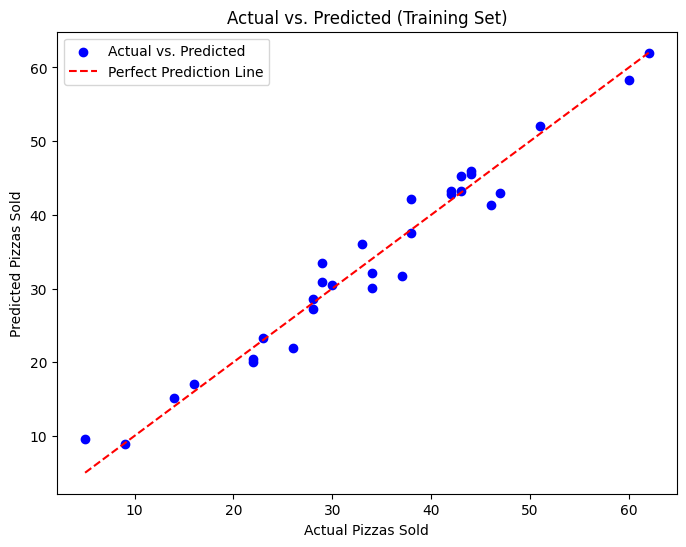

In [85]:
# Function to plot actual vs. predicted data
def plot_predictions(actual, predicted, title="Actual vs. Predicted", xlabel="Actual", ylabel="Predicted"):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='blue', label='Actual vs. Predicted')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='red', label='Perfect Prediction Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plotting actual vs. predicted for training set
plot_predictions(y_train, y_pred, title="Actual vs. Predicted (Training Set)", xlabel="Actual Pizzas Sold", ylabel="Predicted Pizzas Sold")


## Conclusion
In this notebook, we implemented linear regression from scratch using Python and Numpy. We defined the model, loss function, and optimization algorithm (gradient descent) and used them to train a model on a synthetic dataset. We also used the trained model to make predictions on new data.